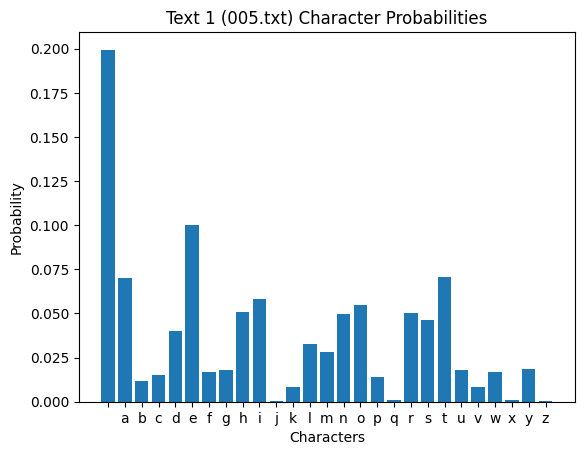

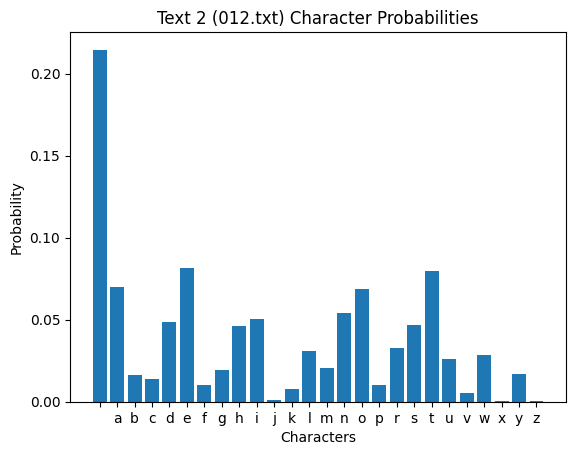

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import entropy
import huffman

text1_name = "005"
text2_name = "012"

def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

text1 = load_text(f'data/{text1_name}.txt')
text2 = load_text(f'data/{text2_name}.txt')

def calculate_probabilities(text):
    total_chars = len(text)
    char_counts = Counter(text)
    probabilities = {char: count / total_chars for char, count in char_counts.items()}
    return probabilities

prob1 = calculate_probabilities(text1)
prob2 = calculate_probabilities(text2)

def plot_probabilities(probabilities, title):
    sorted_probabilities = sorted(probabilities.items(), key=lambda x: x[0])

    chars = [item[0] for item in sorted_probabilities]
    probs = [item[1] for item in sorted_probabilities]
    plt.bar(chars, probs)
    plt.title(title)
    plt.xlabel('Characters')
    plt.ylabel('Probability')
    plt.show()
    
plot_probabilities(prob1, f'Text 1 ({text1_name}.txt) Character Probabilities')
plot_probabilities(prob2, f'Text 2 ({text2_name}.txt) Character Probabilities')

In [3]:
def calculate_entropy(probabilities):
    prob_array = np.array(list(probabilities.values()))
    return entropy(prob_array, base=2)

entropy1 = calculate_entropy(prob1)
entropy2 = calculate_entropy(prob2)

print(f"Entropy of Text 1: {entropy1}")
print(f"Entropy of Text 2: {entropy2}")

Entropy of Text 1: 4.063029469283236
Entropy of Text 2: 4.013324175445842


In [12]:
huffman_code = huffman.codebook(prob1.items())

print("Huffman Code for Text 1:")
for char, code in sorted(huffman_code.items()):
    print(f"'{char}': {code}")

Huffman Code for Text 1:
' ': 00
'a': 1011
'b': 1110010
'c': 100110
'd': 11011
'e': 1111
'f': 101010
'g': 101011
'h': 0110
'i': 1000
'j': 11100010111
'k': 1110000
'l': 10100
'm': 10010
'n': 0100
'o': 0111
'p': 1110011
'q': 1110001010
'r': 0101
's': 11101
't': 1100
'u': 110100
'v': 11100011
'w': 100111
'x': 111000100
'y': 110101
'z': 11100010110


In [6]:
def expected_code_length(probabilities, code):
    return sum(probabilities[char] * len(code[char]) for char in probabilities)

expected_length1 = expected_code_length(prob1, huffman_code)
expected_length2 = expected_code_length(prob2, huffman_code)

print(f"Expected Code Length for Text 1: {expected_length1}")
print(f"Expected Code Length for Text 2: {expected_length2}")

Expected Code Length for Text 1: 4.107024029574862
Expected Code Length for Text 2: 4.079032840129917


In [7]:
print(f"Entropy of Text 1: {entropy1}")
print(f"Expected Code Length for Text 1: {expected_length1}")
print(f"Entropy of Text 2: {entropy2}")
print(f"Expected Code Length for Text 2: {expected_length2}")

Entropy of Text 1: 4.063029469283236
Expected Code Length for Text 1: 4.107024029574862
Entropy of Text 2: 4.013324175445842
Expected Code Length for Text 2: 4.079032840129917
